In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("Water Data's Ariani for PCA.xlsx")

In [3]:
df

,SMP-DAT,DO (% Sat),DO (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),pH (unit),NH3-NL (mg/l),TEMP (Deg C),COND (uS),...,TUR (NTU),DS (mg/l),TS (mg/l),NO3 (mg/l),PO4 (mg/l),OG (mg/l),MBAS (mg/l),E-coli (cfu/100ml),Coliform (cfu/100ml),WQI
0,2000-01-23 00:00:00,40.7,3.39,1,19,26,5.79,0.08,24.78,53.7,...,74.0,75.1,101.1,0.89,0.01,<1,<0.05,190,2000,64.40
1,2000-02-27 00:00:00,58.1,4.79,6,20,14,5.63,<0.01,25.25,50.7,...,54.0,40.0,54.0,0.88,0.03,2,<0.05,3000,6000,59.62
2,2000-03-27 00:00:00,65.1,5.34,1,19,23,5.76,<0.01,25.51,53.7,...,78.0,39.0,86.0,0.62,<0.01,<1,<0.05,1500,3900,65.00
3,2000-04-26 00:00:00,68.1,5.58,7,19,35,5.66,<0.01,25.66,51.9,...,140.0,28.0,63.0,0.68,<0.01,<1,<0.05,6000,9000,40.89
4,2000-05-30 00:00:00,55.1,4.46,2,19,43,6.09,0.3,26.08,61.5,...,89.0,23.0,66.0,0.09,<0.01,<1,<0.05,4300,5500,47.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2018-05-02 15:12:00,88.296,6.902,4,14,118,6.055,0.11,28.07,76.727,...,NaN,NaN,NaN,5.26,<0.010,NaN,NaN,600,39000,48.03
215,2018-07-03 11:06:00,94.002,7.719,4,15,36,6.594,0.07,25.334,67.954,...,NaN,NaN,NaN,3.65,Triennial,NaN,NaN,1000,34000,47.50
216,2018-09-03 09:37:00,82.502,6.771,4,14,29,6.547,0.14,25.364,81.267,...,NaN,NaN,NaN,2.59,<0.010,NaN,NaN,2600,51000,29.32
217,2018-11-02 08:54:00,89,7.329,7,21,19,6.548,0.1,25.18,81.481,...,NaN,NaN,NaN,4.82,<0.010,NaN,NaN,1200,50000,65.74


In [4]:
df2 = df.copy()
df2

,SMP-DAT,DO (% Sat),DO (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),pH (unit),NH3-NL (mg/l),TEMP (Deg C),COND (uS),...,TUR (NTU),DS (mg/l),TS (mg/l),NO3 (mg/l),PO4 (mg/l),OG (mg/l),MBAS (mg/l),E-coli (cfu/100ml),Coliform (cfu/100ml),WQI
0,2000-01-23 00:00:00,40.7,3.39,1,19,26,5.79,0.08,24.78,53.7,...,74.0,75.1,101.1,0.89,0.01,<1,<0.05,190,2000,64.40
1,2000-02-27 00:00:00,58.1,4.79,6,20,14,5.63,<0.01,25.25,50.7,...,54.0,40.0,54.0,0.88,0.03,2,<0.05,3000,6000,59.62
2,2000-03-27 00:00:00,65.1,5.34,1,19,23,5.76,<0.01,25.51,53.7,...,78.0,39.0,86.0,0.62,<0.01,<1,<0.05,1500,3900,65.00
3,2000-04-26 00:00:00,68.1,5.58,7,19,35,5.66,<0.01,25.66,51.9,...,140.0,28.0,63.0,0.68,<0.01,<1,<0.05,6000,9000,40.89
4,2000-05-30 00:00:00,55.1,4.46,2,19,43,6.09,0.3,26.08,61.5,...,89.0,23.0,66.0,0.09,<0.01,<1,<0.05,4300,5500,47.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,2018-05-02 15:12:00,88.296,6.902,4,14,118,6.055,0.11,28.07,76.727,...,NaN,NaN,NaN,5.26,<0.010,NaN,NaN,600,39000,48.03
215,2018-07-03 11:06:00,94.002,7.719,4,15,36,6.594,0.07,25.334,67.954,...,NaN,NaN,NaN,3.65,Triennial,NaN,NaN,1000,34000,47.50
216,2018-09-03 09:37:00,82.502,6.771,4,14,29,6.547,0.14,25.364,81.267,...,NaN,NaN,NaN,2.59,<0.010,NaN,NaN,2600,51000,29.32
217,2018-11-02 08:54:00,89,7.329,7,21,19,6.548,0.1,25.18,81.481,...,NaN,NaN,NaN,4.82,<0.010,NaN,NaN,1200,50000,65.74


In [5]:
for l,c in df2.items():    
    for i in c.index:
        s = str(c[i])
        if s.isalpha():
            c.iat[i] = np.nan            
        elif '<' in s or '>' in s:
            x = s.replace('<','')
            x = x.replace('>','')
            y = float(x)
            p = np.linspace(0, y, 5)
            z = random.choice(p[1:-1])
            # print(f"{l}->{i}: {c[i]} {x} -> {y} -> {z}")
            c.iat[i] = z

In [6]:
df3 = df2.dropna()

In [7]:
df3.shape

(207, 21)

In [8]:
df3.columns

Index(['SMP-DAT', 'DO (% Sat) ', 'DO (mg/l)', 'BOD (mg/l)', 'COD (mg/l)',
       'SS (mg/l)', 'pH (unit)', 'NH3-NL (mg/l)', 'TEMP (Deg C)', 'COND (uS)',
       'SAL (ppt)', 'TUR (NTU)', 'DS (mg/l)', 'TS (mg/l)', 'NO3 (mg/l)',
       'PO4 (mg/l)', 'OG (mg/l)', 'MBAS (mg/l)', 'E-coli (cfu/100ml)',
       'Coliform (cfu/100ml)', 'WQI'],
      dtype='object')

In [9]:
columns = list(df3.columns)
features = columns[1:-1]

In [10]:
target = columns[-1]

In [11]:
x_data = df3.loc[:, features]
y_target = df3.loc[:,target]

In [12]:
x_data.shape, y_target.shape

((207, 19), (207,))

In [13]:
y_target = y_target.round(decimals=-1)

In [14]:
x_data.shape, y_target.shape

((207, 19), (207,))

In [15]:
x_data2 = StandardScaler().fit_transform(x_data)

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_data2)
df_principal = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
pca.explained_variance_ratio_

array([0.24049595, 0.13065959])

In [18]:
df_principal

,principal component 1,principal component 2
0,0.560024,0.665030
1,0.027584,0.242623
2,-0.061420,-0.013183
3,-0.147841,0.980153
4,0.288429,0.630244
...,...,...
202,-0.796837,-0.705437
203,-0.760567,-1.202890
204,-0.440321,-1.254747
205,-0.077880,-0.487309


In [19]:
df_target = pd.DataFrame(y_target.values, columns = ['target'])

In [20]:
df_final = pd.concat([df_principal, df_target], axis = 1)

In [21]:
df_final

,principal component 1,principal component 2,target
0,0.560024,0.665030,60.0
1,0.027584,0.242623,60.0
2,-0.061420,-0.013183,60.0
3,-0.147841,0.980153,40.0
4,0.288429,0.630244,50.0
...,...,...,...
202,-0.796837,-0.705437,50.0
203,-0.760567,-1.202890,60.0
204,-0.440321,-1.254747,40.0
205,-0.077880,-0.487309,40.0


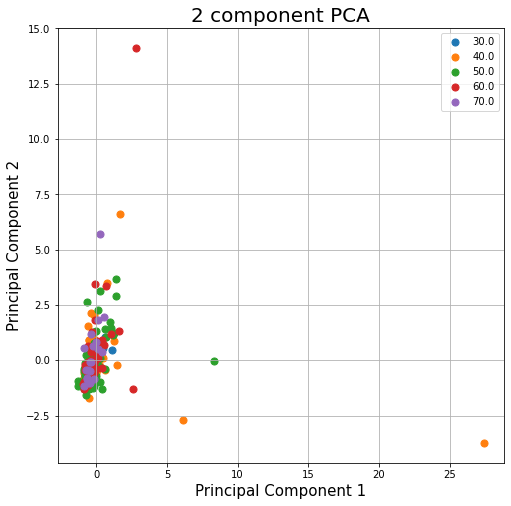

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = np.sort(df_target.iloc[:,0].unique())

for target in targets:
    indicesToKeep = df_final['target'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'principal component 1']
               , df_final.loc[indicesToKeep, 'principal component 2']
               , c = next(ax._get_lines.prop_cycler)['color']
               , s = 50)
ax.legend(targets)
ax.grid()